Fashon- mnist CNN with autoencoders

In [ ]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
from numpy import argmax, array_equal
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Model
from imgaug import augmenters
from random import randint

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
##Loading dataset
train = pd.read_csv("/content/fashion-mnist_test.csv")
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

***Train and validation dataset***

In [ ]:
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

***Reshape***

In [ ]:
train_x = train_x/255.
val_x = val_x/255

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

***Introducing noise***

In [ ]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

***Before adding noise***

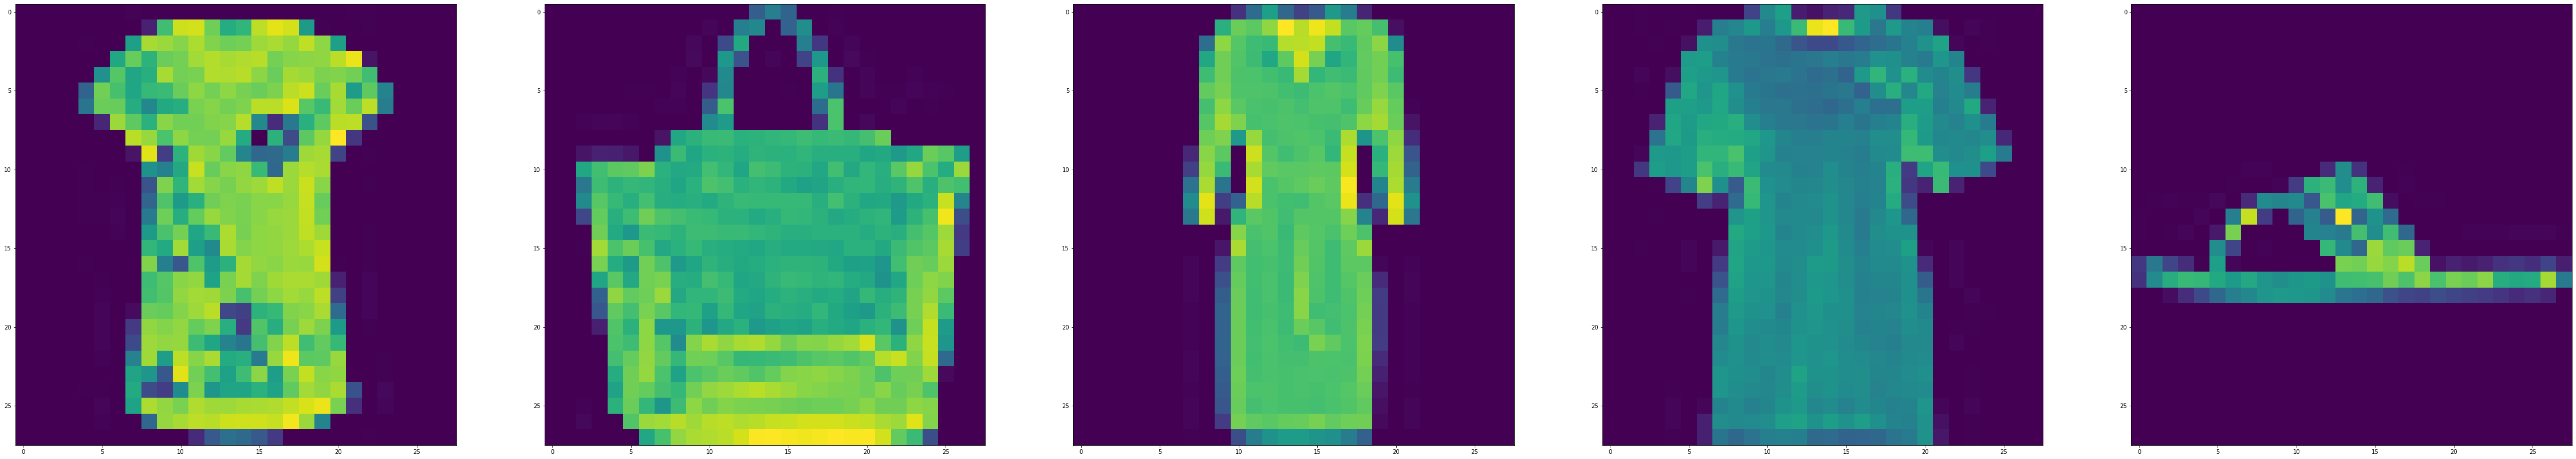

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

***After adding noise***

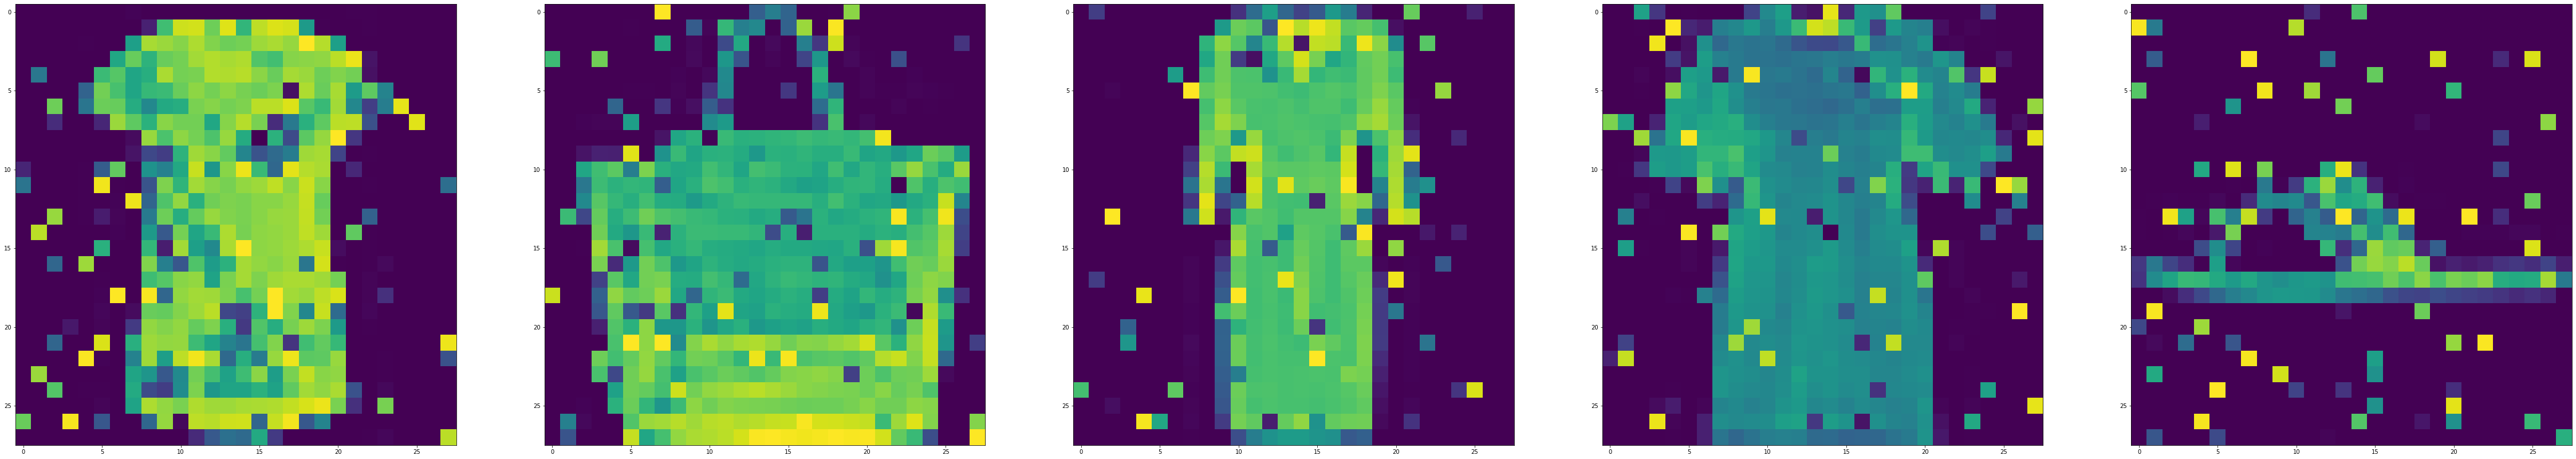

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

***Input layer***

In [ ]:
input_layer = Input(shape=(28, 28, 1))

***Encoding architecture***

In [ ]:
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)


***Decoding architecture***

In [ ]:
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

***Compiling model***

In [ ]:
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

***Model summary***

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624  

***Fitting model***

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model.fit(train_x_n, train_x, epochs=500, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/500
4/4 [==============================] - 33s 8s/step - loss: 0.1488 - val_loss: 0.1310
Epoch 2/500
4/4 [==============================] - 32s 8s/step - loss: 0.1045 - val_loss: 0.0938
Epoch 3/500
4/4 [==============================] - 34s 9s/step - loss: 0.0934 - val_loss: 0.0795
Epoch 4/500
4/4 [==============================] - 32s 8s/step - loss: 0.0795 - val_loss: 0.0744
Epoch 5/500
4/4 [==============================] - 32s 8s/step - loss: 0.0702 - val_loss: 0.0670
Epoch 6/500
4/4 [==============================] - 32s 8s/step - loss: 0.0628 - val_loss: 0.0573
Epoch 7/500
4/4 [==============================] - 32s 8s/step - loss: 0.0558 - val_loss: 0.0531
Epoch 8/500
4/4 [==============================] - 32s 8s/step - loss: 0.0514 - val_loss: 0.0484
Epoch 9/500
4/4 [==============================] - 32s 8s/step - loss: 0.0472 - val_loss: 0.0454
Epoch 10/500
4/4 [==============================] - 32s 8s/step - loss: 0.0448 - val_loss: 0.0427
Epoch 11/500
4/4 [===========

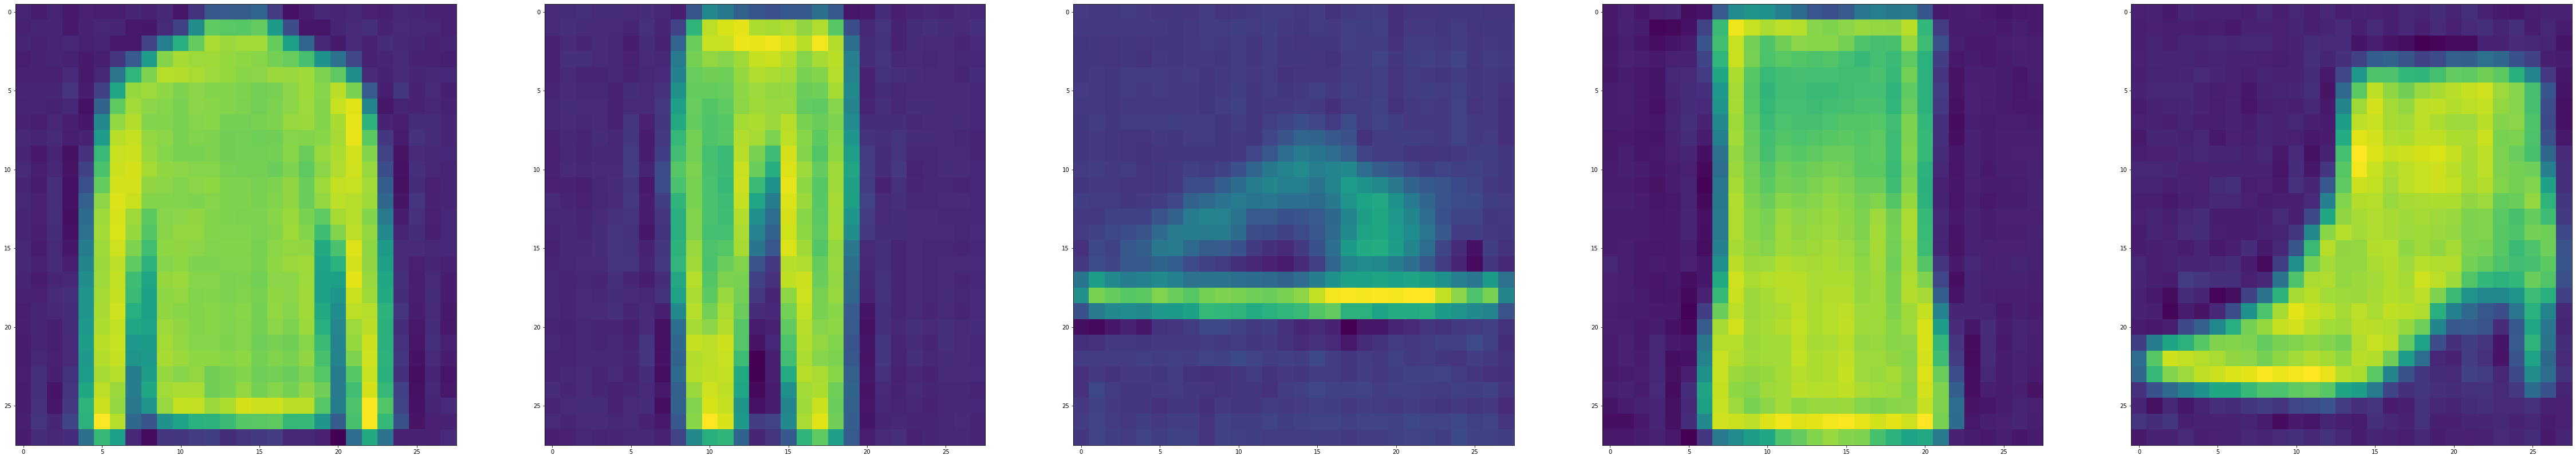

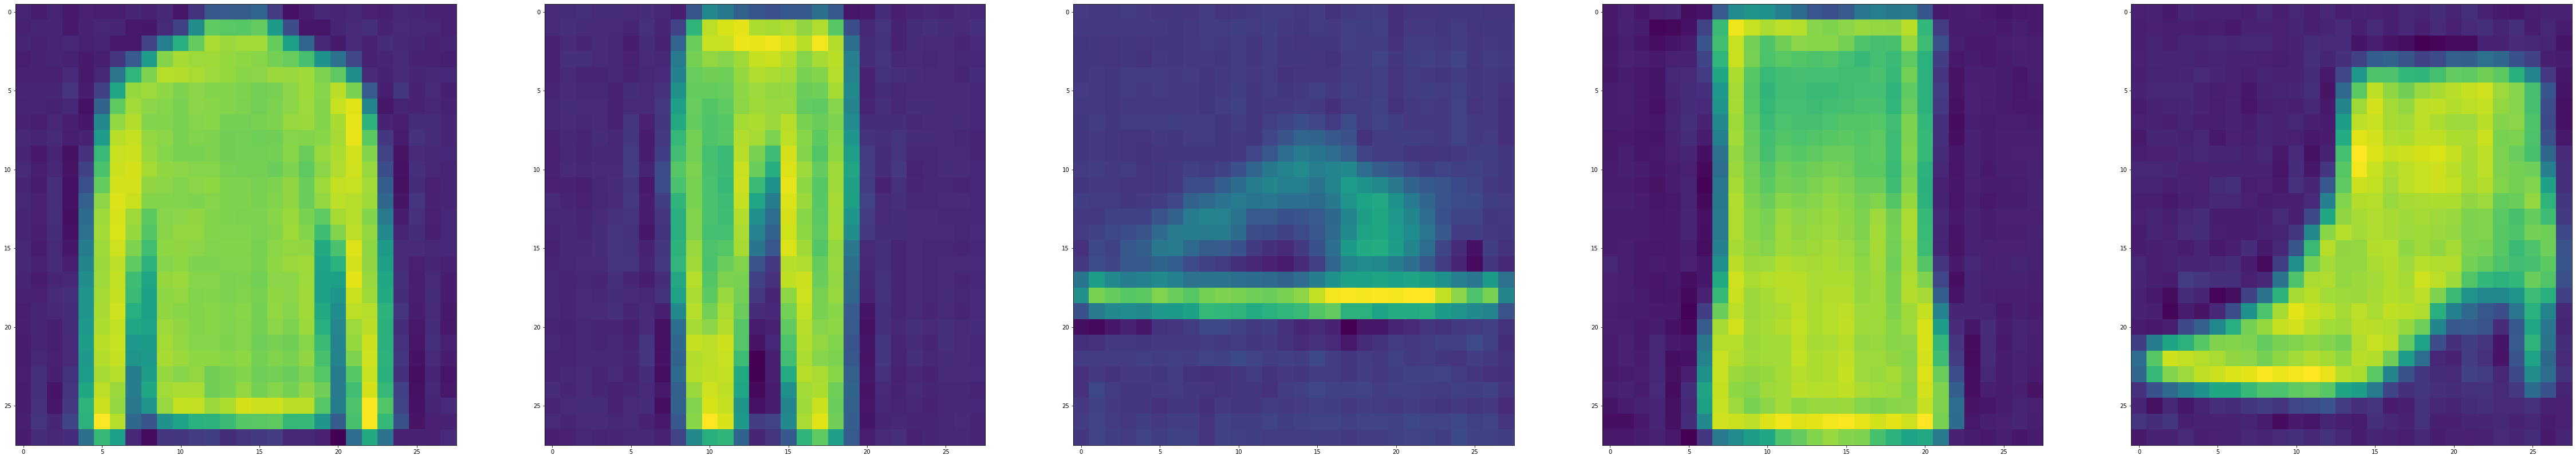

In [ ]:
preds = model.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()